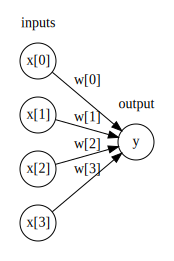

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.plots.plot_logistic_regression_graph()

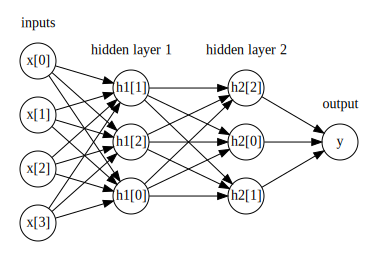

In [2]:
mglearn.plots.plot_two_hidden_layer_graph()

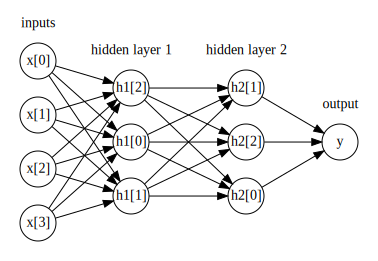

In [3]:
mglearn.plots.plot_two_hidden_layer_graph()

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=52,alpha=0.1)
mlp.fit(x_train,y_train)

x=mlp.predict(x_train)
y=mlp.predict(x_test)
j=0
k=0
#for i in range(len(mlp.predict(x_train))):
for i in range(426):
    if x[i]==1:
        j+=1
    else:
        k+=1
        
for i in range(143):
    if y[i]==1:
        j+=1
    else:
        k+=1
print(len(x))
print(len(x_test))
print('number patients affected(malignant)',k)        
print('number patients not affected(benign)',j)

print('accuracy on training subset: {:.3f}'.format(mlp.score(x_train,y_train)))
print('accuracy on testing subset: {:.3f}'.format(mlp.score(x_test,y_test)))

426
143
number patients affected(malignant) 204
number patients not affected(benign) 365
accuracy on training subset: 0.934
accuracy on testing subset: 0.944


In [14]:
print('maximum for each feature\n{}'.format(cancer.data.max(axis=0)))

maximum for each feature
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled=scaler.fit(x_train).transform(x_train)
x_test_scaled=scaler.fit(x_test).transform(x_test)

mlp=MLPClassifier(max_iter=10000,activation='relu',random_state=42)
mlp.fit(x_train_scaled,y_train)



print('accuracy on training subset: {:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('accuracy on testing subset: {:.3f}'.format(mlp.score(x_test_scaled,y_test)))

accuracy on training subset: 1.000
accuracy on testing subset: 0.958


In [16]:
#improve performance
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(x_train_scaled,y_train)


y=mlp.predict(x_test_scaled)
x=mlp.predict(x_train_scaled)
j=0
k=0
for i in range(len(mlp.predict(x_train_scaled))):
    if x[i]==1:
        j+=1
    else:
        k+=1
        
for i in range(len(mlp.predict(x_test_scaled))):
    if y[i]==1:
        j+=1
    else:
        k+=1
print(len(x_train_scaled)+len(x_test_scaled))
print('number patients affected(malignant)',k)        
print('number patients not affected(benign)',j)

#for i in range(len(x_train)):
 #   if x_train[i]==y_train[i]:
  #      print('malignant')
        
print('accuracy on training subset: {:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('accuracy on testing subset: {:.3f}'.format(mlp.score(x_test_scaled,y_test)))


569
number patients affected(malignant) 210
number patients not affected(benign) 359
accuracy on training subset: 0.986
accuracy on testing subset: 0.972


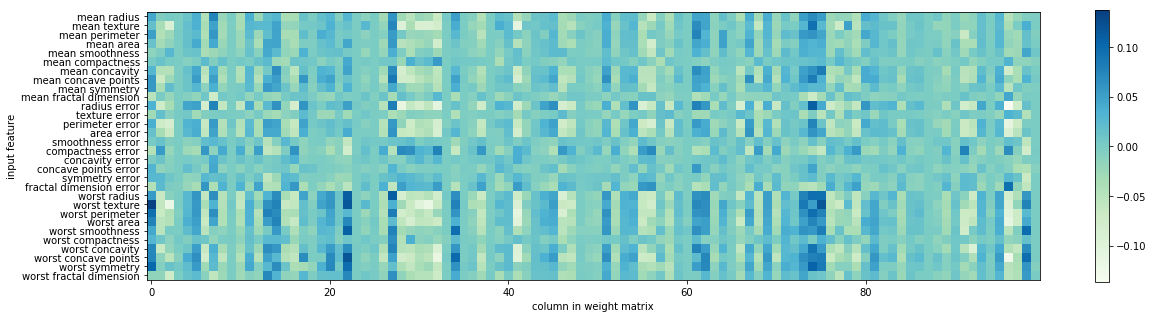

In [17]:
#learning process - weights of the model
#plot figure
#identifying which parameter are important for decision making
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('column in weight matrix')
#show features 
plt.ylabel('input feature')
plt.colorbar()

In [18]:
#improve performance
mlp=MLPClassifier(max_iter=1000,solver='sgd',learning_rate='invscaling',alpha=1,random_state=42)
mlp.fit(x_train_scaled,y_train)


y=mlp.predict(x_test_scaled)
x=mlp.predict(x_train_scaled)
j=0
k=0
for i in range(len(mlp.predict(x_train_scaled))):
    if x[i]==1:
        j+=1
    else:
        k+=1
        
for i in range(len(mlp.predict(x_test_scaled))):
    if y[i]==1:
        j+=1
    else:
        k+=1
print(len(x_train_scaled)+len(x_test_scaled))
print('number patients affected(malignant)',k)        
print('number patients not affected(benign)',j)

#for i in range(len(x_train)):
 #   if x_train[i]==y_train[i]:
  #      print('malignant')
        
print('accuracy on training subset: {:.3f}'.format(mlp.score(x_train_scaled,y_train)))
print('accuracy on testing subset: {:.3f}'.format(mlp.score(x_test_scaled,y_test)))


569
number patients affected(malignant) 211
number patients not affected(benign) 358
accuracy on training subset: 0.857
accuracy on testing subset: 0.902
